In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install pyts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 11.6 MB/s eta 0:00:00


In [ ]:
import scipy.io
from pprint import pprint
import json

In [ ]:
mat_file_path = '/content/drive/MyDrive/projet-sem/12k Drive End Bearing Fault Data/IR007_3.mat'

# Load the MATLAB file
mat_contents = scipy.io.loadmat(mat_file_path)

# Pretty-print the contents
print("Contents of the MATLAB file:")
pprint(mat_contents)

Contents of the MATLAB file:
{'X108RPM': array([[1721]], dtype=uint16),
 'X108_BA_time': array([[ 0.07741674],
       [-0.00241424],
       [-0.06212653],
       ...,
       [ 0.22545009],
       [ 0.2301981 ],
       [ 0.16424902]]),
 'X108_DE_time': array([[ 0.22269856],
       [ 0.09323776],
       [-0.14651649],
       ...,
       [-0.36125573],
       [ 0.31138814],
       [ 0.17055689]]),
 'X108_FE_time': array([[-0.09738545],
       [-0.1808    ],
       [-0.23360182],
       ...,
       [ 0.12265636],
       [ 0.02177818],
       [-0.00143818]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Jan 31'
               b' 15:17:29 2000',
 '__version__': '1.0'}


In [ ]:
import numpy as np

# Access the 'X146_BA_time' variable
ba_time_data = mat_contents['X108_BA_time']

# Flatten the 2D array into a 1D numerical series
ba_time_series = np.ravel(ba_time_data)

# Print the numerical series
print("X146_BA_time series:")
print(ba_time_series)

X146_BA_time series:
[ 0.07741674 -0.00241424 -0.06212653 ...  0.22545009  0.2301981
  0.16424902]


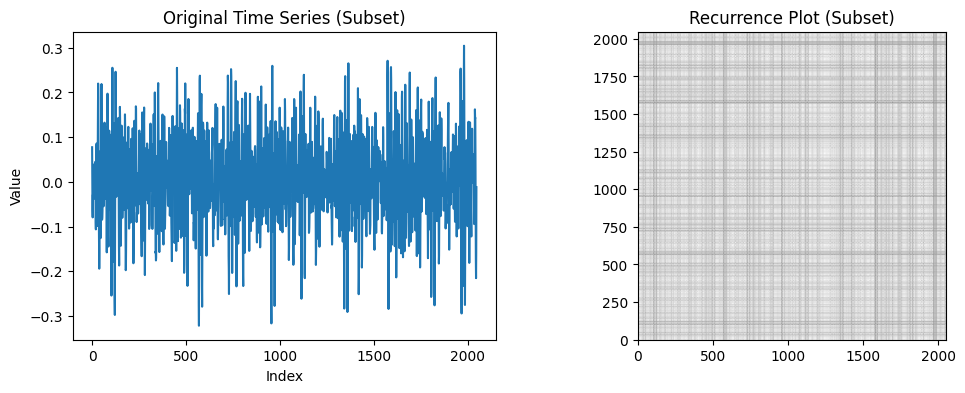

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from pyts.image import RecurrencePlot

# Assuming you have already loaded the time series data into ba_time_series

# Parameters for Recurrence Plot
dimension = 1  # Embedding dimension
time_delay = 1  # Time delay
percentage = 10  # Percentage of recurrence

# Take only the first 2048 values of the time series
ba_time_series_subset = ba_time_series[:2048]

# Reshape the subset of the time series data to a 2D array
ba_time_series_subset_2d = ba_time_series_subset.reshape(1, -1)

# Create Recurrence Plot
rp = RecurrencePlot(dimension=dimension, time_delay=time_delay, percentage=percentage)
ba_time_rp = rp.fit_transform(ba_time_series_subset_2d)

# Plot the original time series subset
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(ba_time_series_subset)
plt.title('Original Time Series (Subset)')
plt.xlabel('Index')
plt.ylabel('Value')

# Plot the Recurrence Plot for the subset
plt.subplot(1, 2, 2)
plt.imshow(ba_time_rp[0], cmap='binary', origin='lower')
plt.title('Recurrence Plot (Subset)')
plt.show()



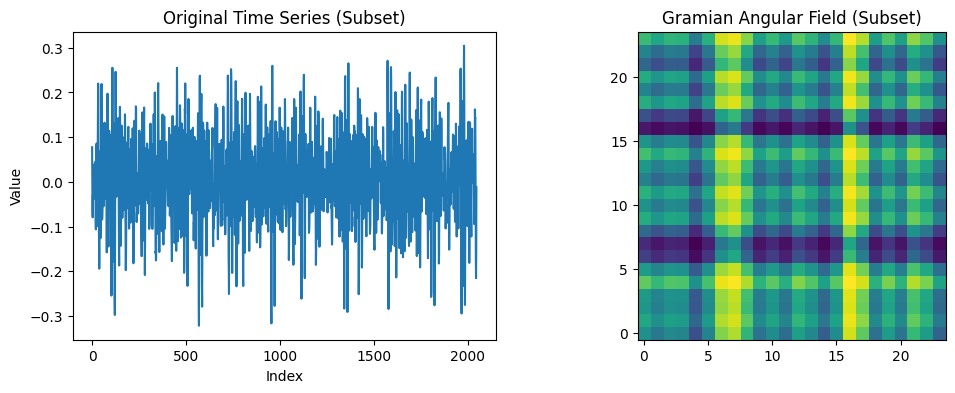

In [ ]:

#gramian
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField

# Assuming you have already loaded the time series data into ba_time_series

# Parameters for GAF
image_size = 24  # Set the size of the image (e.g., 24x24)
method = 'difference'  # 'summation' or 'difference'
sample_range = (0, 1)  # Range of the time series values for normalization

# Take only the first 2048 values of the time series
ba_time_series_subset = ba_time_series[:2048]

# Reshape the subset of the time series data to a 2D array
ba_time_series_subset_2d = ba_time_series_subset.reshape(1, -1)

# Create Gramian Angular Field
gaf = GramianAngularField(image_size=image_size, method=method, sample_range=sample_range)
ba_time_gaf = gaf.fit_transform(ba_time_series_subset_2d)

# Plot the original time series subset
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(ba_time_series_subset)
plt.title('Original Time Series (Subset)')
plt.xlabel('Index')
plt.ylabel('Value')

# Plot the Gramian Angular Field for the subset
plt.subplot(1, 2, 2)
plt.imshow(ba_time_gaf[0], cmap='viridis', origin='lower')
plt.title('Gramian Angular Field (Subset)')
plt.show()
